# Example calculation of PV potential for ERA5 data

In [2]:
import xarray as xr
import numpy as np
import time
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt
from glob import glob 
import my_functions as mf

In [3]:
# location of era5 data on teachinghub
path="/home/yannickh00/LEHRE/msc-intro-comp-met-ex-w2024/data/era5/"

In [4]:
client = Client(n_workers=20, threads_per_worker=5, local_directory='~/tmp')

2024-11-03 14:23:06,196 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 20
Total threads: 100,Total memory: 753.83 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39885,Workers: 20
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 753.83 GiB
Comm: tcp://127.0.0.1:45117,Total threads: 5
Dashboard: http://127.0.0.1:44189/status,Memory: 37.69 GiB
Nanny: tcp://127.0.0.1:42931,


In [6]:
start = time.time()
ds=xr.open_mfdataset(path+"era5-2000-*.nc", engine="netcdf4", chunks={"valid_time":1e5} )
ds["wspd"] = mf.calc_ws(ds)
pvpot = mf.calc_pv_pot(ds).groupby(ds.valid_time.dt.month).mean("valid_time").compute()
end = time.time()
exc_time = end-start
print(f"Calculation took {exc_time:.4f} seconds")
client.shutdown()

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 494 in H5O__attr_open_by_name(): can't locate attribute: '_QuantizeBitGroomNumberOfSignificantDigits'
    major: Attribute
    minor: Object not found
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Ao

Calculation took 72.5921 seconds


Calculate wind speed.

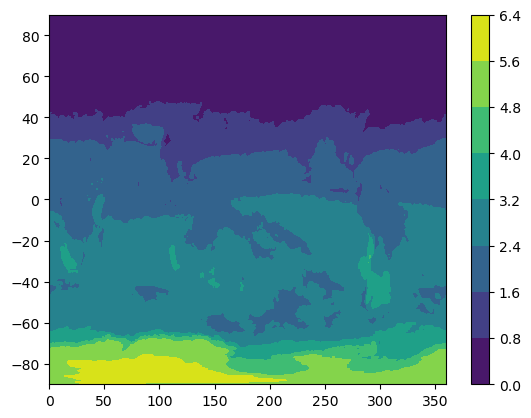

In [10]:
plt.contourf(pvpot.longitude, pvpot.latitude, pvpot.sel(month=12))
plt.colorbar()

In [12]:
for i in range(1,13):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
